# Introduction to Convolutional Neural Networks and computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The image we're working with are from the Food101 dataset (101 classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However, we've modified it to only use two classes (pizza & steak).

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-03-28 15:27:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   184MB/s    in 0.6s    

2023-03-28 15:27:46 (184 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of data.

In [2]:
!ls pizza_steak/train

pizza  steak


In [3]:
import os

# Waltk through pizza_steak dir and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in the {dirpath}")

There are 2 directories and 0 images in the pizza_steak
There are 2 directories and 0 images in the pizza_steak/train
There are 0 directories and 750 images in the pizza_steak/train/steak
There are 0 directories and 750 images in the pizza_steak/train/pizza
There are 2 directories and 0 images in the pizza_steak/test
There are 0 directories and 250 images in the pizza_steak/test/steak
There are 0 directories and 250 images in the pizza_steak/test/pizza


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programatically.

In [5]:
# Get the classnames programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names in subdirectory
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images)
  target_folder = target_dir + target_class
  
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image
   
  return img

['3550805.jpg']
Image shape: (512, 512, 3)


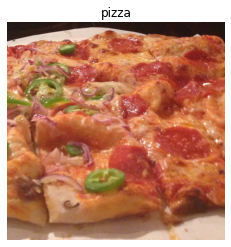

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [8]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 36,  29,  23],
        [ 32,  25,  19],
        [ 31,  24,  18],
        ...,
        [ 30,  15,  18],
        [ 32,  17,  20],
        [ 36,  21,  24]],

       [[ 34,  27,  21],
        [ 33,  26,  20],
        [ 33,  26,  20],
        ...,
        [ 31,  17,  17],
        [ 31,  16,  19],
        [ 33,  18,  21]],

       [[ 33,  26,  20],
        [ 33,  26,  20],
        [ 34,  27,  21],
        ...,
        [ 34,  20,  20],
        [ 32,  17,  20],
        [ 32,  17,  20]],

       ...,

       [[176, 143, 126],
        [174, 141, 122],
        [175, 142, 123],
        ...,
        [225, 194, 176],
        [226, 195, 177],
        [228, 197, 179]],

       [[183, 150, 133],
        [179, 146, 129],
        [177, 144, 127],
        ...,
        [227, 196, 178],
        [227, 196, 178],
        [228, 197, 179]],

       [[192, 159, 142],
        [186, 153, 136],
        [180, 147, 130],
        ...,
        [230, 199, 18

In [9]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

In [10]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.14117647, 0.11372549, 0.09019608],
        [0.1254902 , 0.09803922, 0.0745098 ],
        [0.12156863, 0.09411765, 0.07058824],
        ...,
        [0.11764706, 0.05882353, 0.07058824],
        [0.1254902 , 0.06666667, 0.07843137],
        [0.14117647, 0.08235294, 0.09411765]],

       [[0.13333333, 0.10588235, 0.08235294],
        [0.12941176, 0.10196078, 0.07843137],
        [0.12941176, 0.10196078, 0.07843137],
        ...,
        [0.12156863, 0.06666667, 0.06666667],
        [0.12156863, 0.0627451 , 0.0745098 ],
        [0.12941176, 0.07058824, 0.08235294]],

       [[0.12941176, 0.10196078, 0.07843137],
        [0.12941176, 0.10196078, 0.07843137],
        [0.13333333, 0.10588235, 0.08235294],
        ...,
        [0.13333333, 0.07843137, 0.07843137],
        [0.1254902 , 0.06666667, 0.07843137],
        [0.1254902 , 0.06666667, 0.07843137]],

       ...,

       [[0.69019608, 0.56078431, 0.49411765],
        [0.68235294, 0.55294118, 0.47843137],
        [0.68627451, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess daat (get all the pixel values between 0 & 1 - normalization/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data fro directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # same as the one above
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 248ms/step - loss: 0.5743 - accuracy: 0.6880 - val_loss: 0.3965 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 10s 202ms/step - loss: 0.4423 - accuracy: 0.8127 - val_loss: 0.3667 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4034 - accuracy: 0.8280 - val_loss: 0.3365 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 12s 254ms/step - loss: 0.4170 - accuracy: 0.8193 - val_loss: 0.3279 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3669 - accuracy: 0.8440 - val_loss: 0.3017 - val_accuracy: 0.8800


In [37]:
# Epoch 1/5
# 47/47 [==============================] - 147s 3s/step - loss: 0.5660 - accuracy: 0.7047 - val_loss: 0.4572 - val_accuracy: 0.8060


In [35]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 218ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 249ms/step - loss: 0.6932 - accuracy: 0.4693 - val_loss: 0.6931 - val_accuracy: 0.5020


In [13]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), our model performs terribly, let's try improving it

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 219ms/step - loss: 2.5253 - accuracy: 0.6373 - val_loss: 0.6312 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 12s 255ms/step - loss: 0.8219 - accuracy: 0.6887 - val_loss: 1.4178 - val_accuracy: 0.6180
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.6746 - accuracy: 0.7333 - val_loss: 0.8548 - val_accuracy: 0.6500
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6901 - accuracy: 0.7260 - val_loss: 0.4700 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 13s 282ms/step - loss: 0.4781 - accuracy: 0.7800 - val_loss: 0.4971 - val_accuracy: 0.7640


In [18]:
# Get a summary of model_3
model_3.summary() # this one is really bad in comparison with first model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 100)               15052900  
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________
